<h1><center>Customer Churn Prediction<br></center></h1>


----------------
**Réalisé par:**
- AKHADAM Ayoub
- OUALHBIB Idriss
---------------

### Importation

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings('ignore')

C:\Users\AKH\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\AKH\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\AKH\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\AKH\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


## Jeu de données

- Le jeu de données contient 20 colonnes (variables indépendantes) qui indiquent les caractéristiques des clients d'une société de télécommunications fictive.


- La variable cible **"Churn"** indique si le client a quitté l'entreprise au cours du dernier mois ou non. La classe Non comprend les clients qui n'ont pas quitté l'entreprise le mois dernier, tandis que la classe Oui contient les clients qui ont décidé de mettre fin à leurs relations avec l'entreprise.


- L'objectif de l'analyse est de: 

    - Obtenir la relation entre les caractéristiques du client et le churn.
    - Construire un modèle sur l'ensemble de données de désabonnement des d’une entreprise de télécommunication «Telco»
    - Prédire si un client va churn en fonction de ses informations démographiques et de service.

In [2]:
teleco = pd.read_csv('churn_TP.csv')
teleco.head()

,Reg US,Dur Vie,Cod Dept,NumTel,Intnat,Mail,Nb Msg,Conso Jr Mn,App Jr,CA Jour,...,App Sr,CA Soirï¿½e,Conso Nt Mn,App Nt,CA Nuit,Conso Int Mn,App Int,CA Internat,Serv Cli,Churn?
0,KS,128.0,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,1000.0,3,2.70,1,False.
1,OH,107.0,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137.0,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,NaN,408,375-9999,yes,no,0,299.4,71,50.90,...,88,NaN,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75.0,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [3]:
teleco.columns

Index(['Reg US', 'Dur Vie', 'Cod Dept', 'NumTel', 'Intnat', 'Mail', 'Nb Msg',
       'Conso Jr Mn', 'App Jr', 'CA Jour', 'Conso Sr Mn', 'App Sr',
       'CA Soirï¿½e', 'Conso Nt Mn', 'App Nt', 'CA Nuit', 'Conso Int Mn',
       'App Int', 'CA Internat', 'Serv Cli', 'Churn?'],
      dtype='object')

- Reg US: la region dans laquelle le client réside, indiqué par une abréviation à deux lettres (OH, NJ, ... )
- Dur Vie: le nombre de jours où ce compte a été actif.
- Cod Dept: l'indicatif régional à trois chiffres du numéro de téléphone du client correspondant.
- NumTel: le numéro de téléphone.
- Intnat:  si le client a un plan d'appel international : oui/non
- Mail: si le client dispose d'une fonction de messagerie vocale : oui/non
- Nb Msg: Le nombre moyen de messages vocaux par mois.

    
- Conso Jr Mn: le nombre total de minutes d'appel utilisées pendant la journée.
- App Jr: le nombre total d'appels passés pendant la journée.
- CA Jour: le coût facturé des appels de jour.

    

- Conso Sr Mn: le nombre total de minutes d'appel utilisées pendant la soirée.
- App Sr: le nombre total d'appels passés pendant la soirée.
- CA Soiree: le coût facturé pour les appels passés pendant la soirée.


- Conso Nt Mn: le nombre total de minutes d'appel utilisées pendant la nuit.
- App Nt: le nombre total d'appels passés pendant la nuit.
- CA Nuit: le coût facturé pour les appels passés pendant nuit
  

- Conso Int Mn: le nombre total de minutes d'appels internationaux.
- App Int: le nombre total d'appels internationaux.
- CA Internat: le coût facturé pour les appels internationaux.


- Serv Cli: le nombre d'appels passés au service clientèle.


- Churn: si le client a quitté le service : true/fale

In [4]:
teleco.shape

(3246, 21)

> On a 3246 observations et 21 variables.

In [5]:
# Ronommer 'CA Soirï¿½e' en 'CA Soiree'
teleco = teleco.rename(columns={'CA Soirï¿½e':'CA Soiree'})

# Ronommer la colonne 'Churn?' en 'Churn' 
teleco = teleco.rename(columns={'Churn?':'Churn'})

# Remplacer 'True.' et 'False.' par 'True' et 'False'
teleco["Churn"].replace({"True.": True, "False.": False}, inplace=True)

# ON remarque que la varibale Mail prends des valeurs de 'no' différentes (no, non)
# Remplaçons donc 'non' par 'no'
teleco["Mail"].replace({"non": "no"}, inplace=True)

# Supprimons la variable numréo de telephone
teleco = teleco.drop("NumTel", axis=1)

teleco["Cod Dept"] = teleco["Cod Dept"].astype(object)

In [6]:
teleco.head()

,Reg US,Dur Vie,Cod Dept,Intnat,Mail,Nb Msg,Conso Jr Mn,App Jr,CA Jour,Conso Sr Mn,App Sr,CA Soiree,Conso Nt Mn,App Nt,CA Nuit,Conso Int Mn,App Int,CA Internat,Serv Cli,Churn
0,KS,128.0,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1000.0,3,2.70,1,False
1,OH,107.0,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137.0,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,NaN,408,yes,no,0,299.4,71,50.90,61.9,88,NaN,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75.0,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
for column in teleco.columns:
    print('Column: {} - Unique Values: {}'.format(column, teleco[column].unique()))

Column: Reg US - Unique Values: ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
Column: Dur Vie - Unique Values: [1.28e+02 1.07e+02 1.37e+02      nan 7.50e+01 1.18e+02 1.21e+02 1.47e+02
 1.17e+02 1.41e+02 6.50e+01 7.40e+01 1.68e+02 9.50e+01 6.20e+01 1.61e+02
 8.50e+01 9.30e+01 7.60e+01 7.30e+01 7.70e+01 1.30e+02 1.11e+02 1.32e+02
 1.74e+02 5.70e+01 5.40e+01 2.00e+01 4.90e+01 1.42e+02 1.72e+02 1.20e+01
 7.20e+01 3.60e+01 7.80e+01 1.36e+02 1.49e+02 9.80e+01 1.35e+02 3.40e+01
 1.60e+02 6.40e+01 5.90e+01 1.19e+02 9.70e+01 5.20e+01 6.00e+01 1.00e+01
 9.60e+01 8.70e+01 8.10e+01 6.80e+01 1.25e+02 1.16e+02 3.80e+01 1.13e+02
 1.26e+02 1.50e+02 1.38e+02 1.62e+02 9.00e+01 5.00e+01 8.20e+01 1.44e+02
 4.60e+01 7.00e+01 5.50e+01 1.06e+02 9.40e+01 1.55e+02 8.00e+01 1.04e+02
 9.90e+01 1.20e+02

In [8]:
teleco.isnull().sum().sum() 

23

>Nous avons 23 valeurs manquantes.

In [9]:
# supprimons les champs des valeurs manquantes
teleco.dropna(inplace = True)

In [10]:
teleco.isnull().sum().sum()

0

In [11]:
teleco.shape

(3224, 20)

## Visualisation des données

#### Proportion d'observations par rapport à la variable réponse (churn)

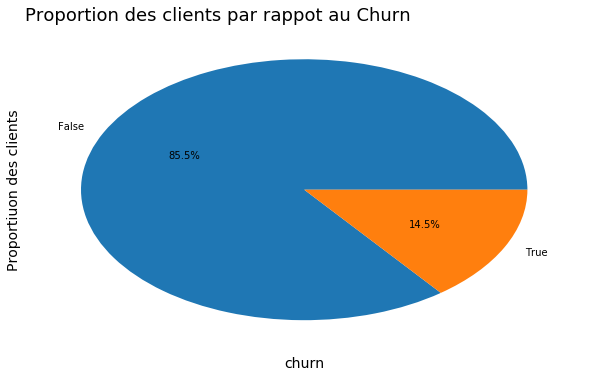

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 6)) 
ax = fig.add_subplot(111)

# proportion d'observation de chaque classe
prop_response = teleco['Churn'].value_counts(normalize=True)

prop_response.plot(kind='pie', ax=ax, autopct='%1.1f%%')


ax.set_title("Proportion des clients par rappot au Churn", fontsize=18, loc='left')
ax.set_xlabel('churn',fontsize=14)
ax.set_ylabel('Proportiuon des clients', fontsize=14)
ax.tick_params(rotation='auto')

>Environ 14.5% des clients se sont désistés.

#### Le nombre de clients churn et non-churn.

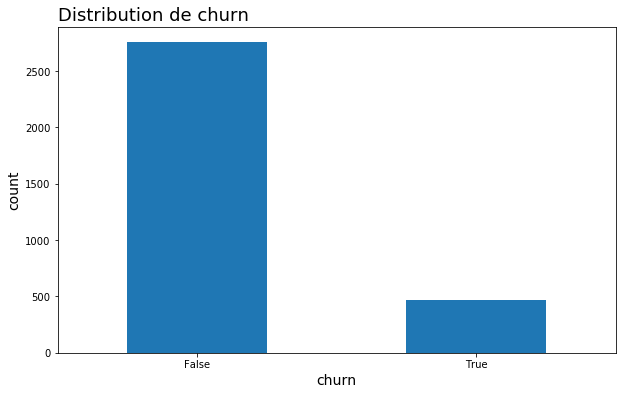

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 6)) 
ax = fig.add_subplot(111)

# proportion d'observation de chaque classe
prop_response = teleco['Churn'].value_counts()
# create a bar plot showing the percentage of churn
prop_response.plot(kind='bar', ax=ax)

# set title and labels
ax.set_title('Distribution de churn',fontsize=18, loc='left')
ax.set_xlabel('churn', fontsize=14)
ax.set_ylabel('count', fontsize=14)
ax.tick_params(rotation='auto')

**Un diagramme à barres montrant le pourcentage de Churn pour chaque catégorie de l'attribut intnat, mail et Cod Dept**


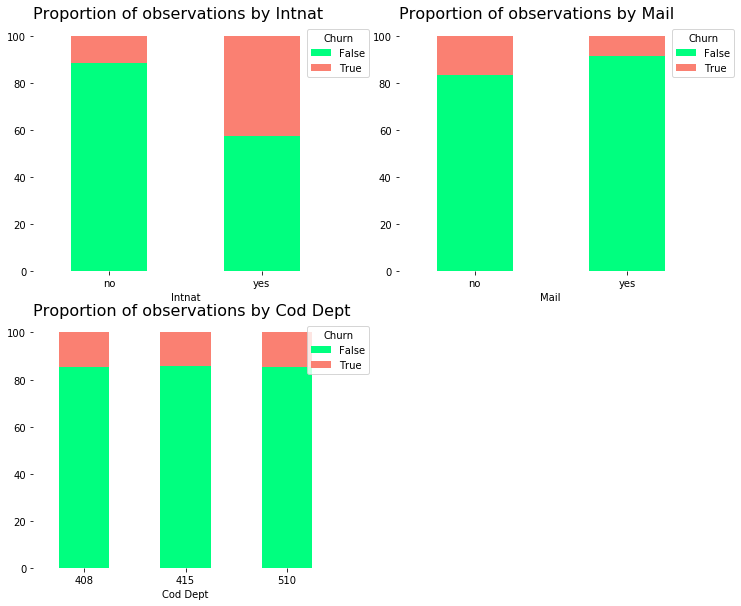

In [14]:
from percentage_stacked_plot import percentage_stacked_plot

columns = ['Intnat' ,'Mail', 'Cod Dept']

percentage_stacked_plot(teleco, columns)

Comme indiqué ci-dessus, chaque barre est une catégorie de la variable indépendante, et elle est subdivisée pour montrer la proportion de chaque classe de réponse (True et False).


- Les clients avec un plan d'appel international se désabonnent plus que ceux qui n'en ont pas.


- Le taux de résiliation (churn) des clients disposant d'une fonction de messagerie vocale est moins que ceux qui n'ent pas.


- Nous ne nous attendons pas à ce que la variable Cod Dept aura un pouvoir prédictif significatif.

**Les graphiques suivants montrent la distribution des varibales numériques par Churn. Pour tous les attributs numériques.**

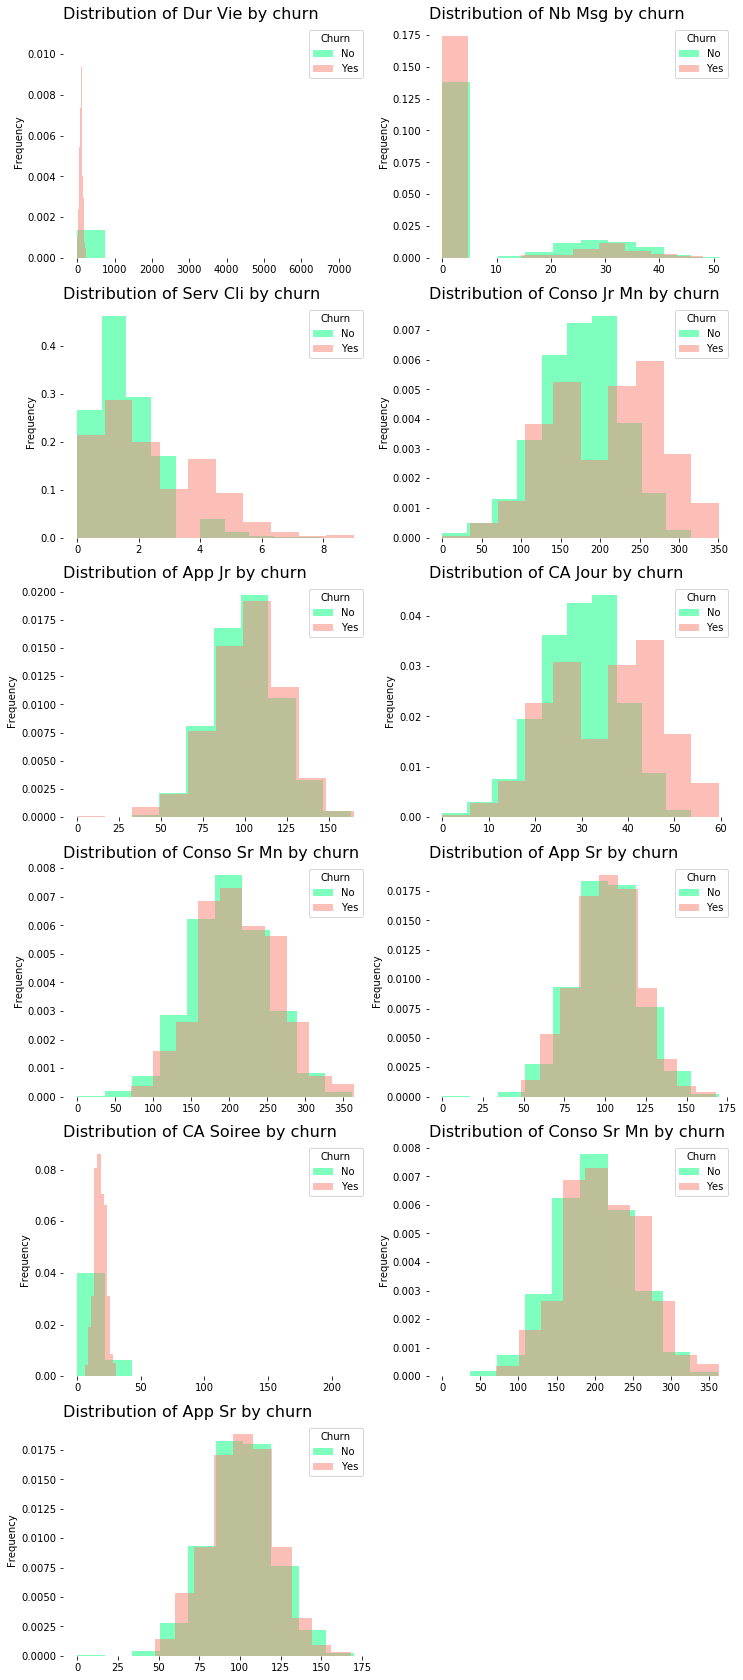

In [15]:
from histogram_plots import histogram_plots
account_columns_numeric = ['Dur Vie', 'Nb Msg', 'Serv Cli', 
                           'Conso Jr Mn', 'App Jr', 'CA Jour', 
                           'Conso Sr Mn', 'App Sr','CA Soiree',
                          'Conso Sr Mn', 'App Sr']


histogram_plots(teleco, account_columns_numeric)

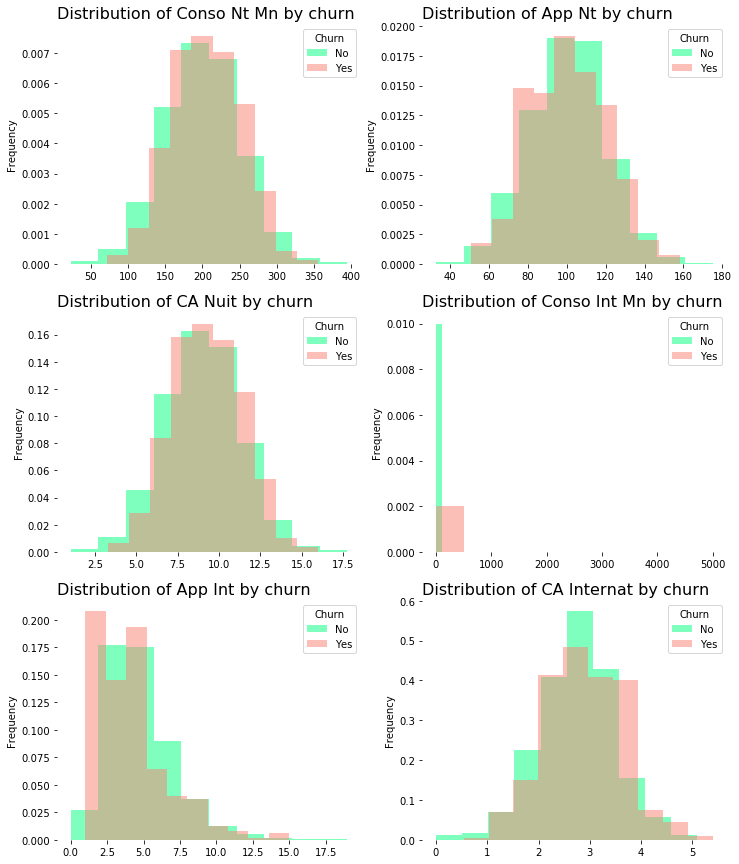

In [16]:
from histogram_plots import histogram_plots
account_columns_numeric = ['Conso Nt Mn', 'App Nt', 'CA Nuit',
                           'Conso Int Mn','App Int', 'CA Internat']

histogram_plots(teleco, account_columns_numeric)

- Dur vie représente le nombre de jours où ce compte a été actif, on remarque que Les nouveaux clients sont plus susceptibles de se désabonner.


- Les clients dont le nombre moyen de messagee vocaux par mois bas sont plus susceptibles de se désabonner.


- Les clients dont le nombre d'appels passés au service clientèle ou le coût facturé des appels de jour élevées sont plus susceptibles de se désabonner.

### Corrélation

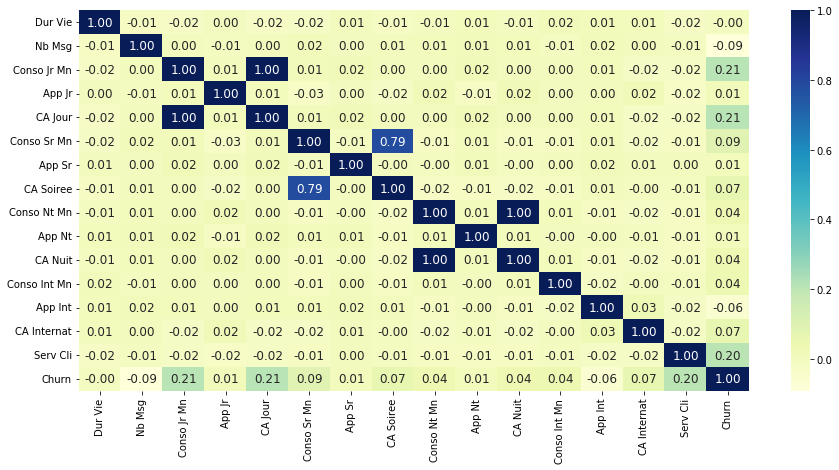

In [17]:
corr = teleco.corr()
fig4, ax = plt.subplots(figsize=(15,7))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,cmap="YlGnBu",annot_kws={'size': 12},fmt=".2f")

- Nous voyons plusieurs caractéristiques qui ont essentiellement une corrélation de 100% les unes avec les autres. Supprimons donc une caractéristique de chacune des paires hautement corrélées : CA jour de la paire avec Conjo jr Mn, CA Nuit de la paire avec Conso Nt Min , CA internat de la paire avec Conso Int Mn.
 

- Supprimons aussi 'Reg US' et 'Cod Dept' car on'a remarqué précedement qu'ils seront pas utils.

In [18]:
data = teleco.drop(["CA Jour", "CA Soiree", "CA Nuit", "CA Internat", 'Reg US', 'Cod Dept'], axis=1)

In [19]:
data.columns

Index(['Dur Vie', 'Intnat', 'Mail', 'Nb Msg', 'Conso Jr Mn', 'App Jr',
       'Conso Sr Mn', 'App Sr', 'Conso Nt Mn', 'App Nt', 'Conso Int Mn',
       'App Int', 'Serv Cli', 'Churn'],
      dtype='object')

In [20]:
# Convertir la variable cible en une variable numérique binaire
data["Churn"].replace({True: 1, False: 0}, inplace=True)

Convertissons les caractéristiques catégorielles en caractéristiques numériques

In [21]:
model_data = pd.get_dummies(data)

###  Division des données en ensembles d'apprentissage et de test

In [22]:
# sélectionner les variables indépendantes
X = model_data.drop(columns='Churn')

# sélectionner les variables explicatives
y = model_data.loc[:, 'Churn']

print(X.columns)

print(y.name)

Index(['Dur Vie', 'Nb Msg', 'Conso Jr Mn', 'App Jr', 'Conso Sr Mn', 'App Sr',
       'Conso Nt Mn', 'App Nt', 'Conso Int Mn', 'App Int', 'Serv Cli',
       'Intnat_no', 'Intnat_yes', 'Mail_no', 'Mail_yes'],
      dtype='object')
Churn


In [23]:
# split the data in training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40, shuffle=True)

### Entraîner les modèles

In [24]:
seed=2

classifiers = [LogisticRegression(random_state=seed),
               SVC(random_state=seed), 
               AdaBoostClassifier(),
               KNeighborsClassifier(),
               RandomForestClassifier(random_state=seed),
               GradientBoostingClassifier(random_state=seed)]

In [25]:
for cls in classifiers:
    cls.fit(X_train, y_train)

### Les matrices de confusion

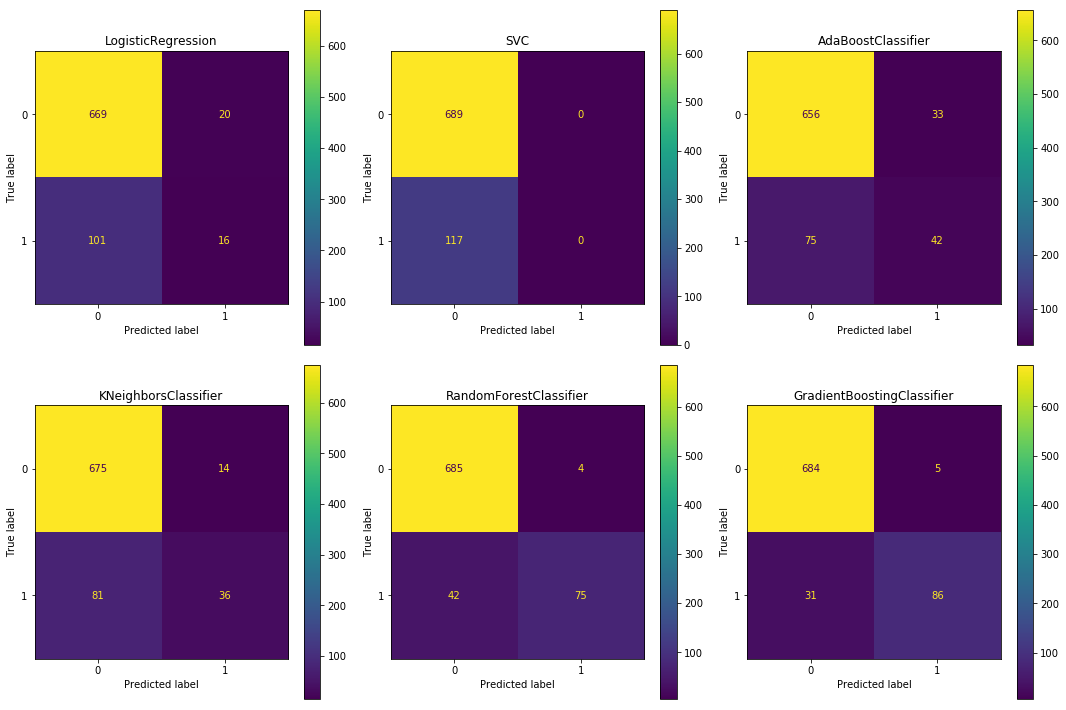

In [26]:
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from matplotlib import pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

for cls, ax in zip(classifiers, axes.flatten()):
    conf_mat = confusion_matrix(y_test, cls.predict(X_test))
    disp = ConfusionMatrixDisplay(conf_mat)
    disp.plot(ax=ax)
    disp.ax_.set_title(type(cls).__name__)
    
plt.tight_layout()  
plt.show()    

In [27]:
# import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# import PrettyTable
from prettytable import PrettyTable

    
table = PrettyTable()
table.field_names = ["Classifier","Rappel", "Précision", "F-score","Accuracy", "Taux d’erreur"]

for cls in classifiers: 
    table.add_row([type(cls).__name__ , 
                   "%.2f" % recall_score(y_test, cls.predict(X_test), average='macro'), 
                   "%.2f" % precision_score(y_test, cls.predict(X_test), average='macro'), 
                   "%.2f" % f1_score(y_test, cls.predict(X_test), average='macro'), 
                   "%.2f" % accuracy_score(y_test, cls.predict(X_test)),
                   "%.2f" % (1 - accuracy_score(y_test, cls.predict(X_test))) ])
print(table)

# 85% 85% 87% 88% 95% 96%

+----------------------------+--------+-----------+---------+----------+---------------+
|         Classifier         | Rappel | Précision | F-score | Accuracy | Taux d’erreur |
+----------------------------+--------+-----------+---------+----------+---------------+
|     LogisticRegression     |  0.55  |    0.66   |   0.56  |   0.85   |      0.15     |
|            SVC             |  0.50  |    0.43   |   0.46  |   0.85   |      0.15     |
|     AdaBoostClassifier     |  0.66  |    0.73   |   0.68  |   0.87   |      0.13     |
|    KNeighborsClassifier    |  0.64  |    0.81   |   0.68  |   0.88   |      0.12     |
|   RandomForestClassifier   |  0.82  |    0.95   |   0.87  |   0.94   |      0.06     |
| GradientBoostingClassifier |  0.86  |    0.95   |   0.90  |   0.96   |      0.04     |
+----------------------------+--------+-----------+---------+----------+---------------+


>On comparant les métriques d'évaluation de chaque modèle, on remarque que 'Gradient Boosting' est celui qui donnes les meilleurs résultats.